In [1]:
import numpy, pandas, quandl

In [1]:
import numpy as np 
import pandas as pd
import quandl
from pylab import mpl, plt
plt.style.use('seaborn')
%matplotlib inline
import pandas_datareader.data as web
import datetime
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas import Series, DataFrame
import statsmodels.formula.api as smf

quandl.ApiConfig.api_key = "pTygJpdkhxBLRczvBgTp"


In [2]:
# import S&P 500 Prices and % Change from Excel 
names= ['Date','Adjusted Close', '% Change']
df = pd.read_excel('SP500 Prices.xlsx', names=['Date','Adjusted Close','% Change'])
df.head()


df = pd.read_excel('SP500 Prices.xlsx', names=names, index_col='Date')
df.head()




df




,Adjusted Close,% Change
Date,,
1970-01-30,85.02,-7.647187
1970-02-27,89.50,5.269348
1970-03-31,89.63,0.145251
1970-04-30,81.52,-9.048310
1970-05-29,76.55,-6.096663
...,...,...
2020-08-31,3500.31,7.006469
2020-09-30,3363.00,-3.922795
2020-10-30,3269.96,-2.766577


In [3]:
# import ISM PMI from Eccel
names= ['Date','PMI', 'Change PMI']
data = pd.read_excel('PMI_monthly.xlsx', names=names, index_col='Date')
data.head()


data = data.loc[:,['PMI']]
data.head()


,PMI
Date,
1970-01-30,48.7
1970-02-27,47.4
1970-03-31,46.9
1970-04-30,45.0
1970-05-29,47.2


In [4]:
# calculate monthly percentage change of PMI
data1 = data.pct_change()
data1

data1 = data1.rename(columns ={"PMI":"% Change PMI"})
data1.tail()

,% Change PMI
Date,
2020-08-31,0.035382
2020-09-30,0.001799
2020-10-30,0.055655
2020-11-30,-0.018707
2020-12-31,0.048527


In [5]:
# Reduce S&P 500 data to monthly adjusted Close prices
df = df.loc[:,['Adjusted Close']]
df


,Adjusted Close
Date,
1970-01-30,85.02
1970-02-27,89.50
1970-03-31,89.63
1970-04-30,81.52
1970-05-29,76.55
...,...
2020-08-31,3500.31
2020-09-30,3363.00
2020-10-30,3269.96


In [6]:
# Compute returns from Price Series of S&P 500
df_Performance = df.pct_change()
df_Performance.tail()



,Adjusted Close
Date,
2020-08-31,0.070065
2020-09-30,-0.039228
2020-10-30,-0.027666
2020-11-30,0.107546
2020-12-31,0.037121


In [7]:
# Merge returns SPX, Change PMI
Overview = pd.concat([df_Performance,data1], axis=1)
Overview.fillna(0)
Overview = Overview.fillna(0)
Overview.tail()


,Adjusted Close,% Change PMI
Date,,
2020-08-31,0.070065,0.035382
2020-09-30,-0.039228,0.001799
2020-10-30,-0.027666,0.055655
2020-11-30,0.107546,-0.018707
2020-12-31,0.037121,0.048527


In [8]:
# Merge monthly S&P 500 performance, PMI and monthly PMI changes into a table
Overview2 = pd.concat([df_Performance,data,data1], axis=1, names=['Adjusted Close','PMI','Change PMI'])
Overview2 = Overview2.fillna(0)
Overview2

print(Overview2)


            Adjusted Close   PMI  % Change PMI
Date                                          
1970-01-30        0.000000  48.7      0.000000
1970-02-27        0.052693  47.4     -0.026694
1970-03-31        0.001453  46.9     -0.010549
1970-04-30       -0.090483  45.0     -0.040512
1970-05-29       -0.060967  47.2      0.048889
...                    ...   ...           ...
2020-08-31        0.070065  55.6      0.035382
2020-09-30       -0.039228  55.7      0.001799
2020-10-30       -0.027666  58.8      0.055655
2020-11-30        0.107546  57.7     -0.018707
2020-12-31        0.037121  60.5      0.048527

[612 rows x 3 columns]


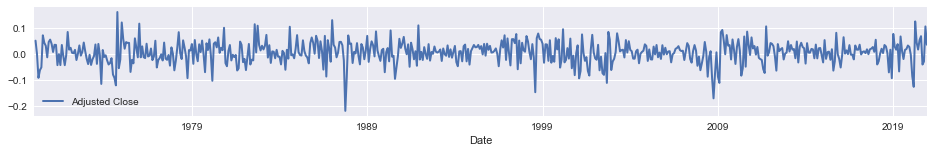

In [84]:
df_Performance.plot(lw=2.0, figsize=(16,2));

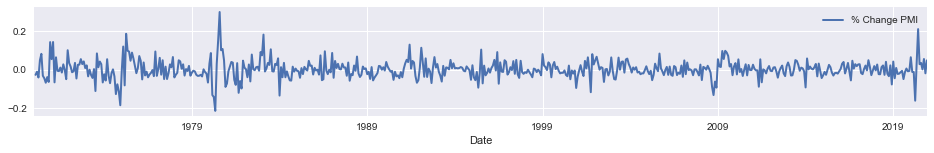

In [83]:
data1.plot(lw=2.0, figsize=(16,2));

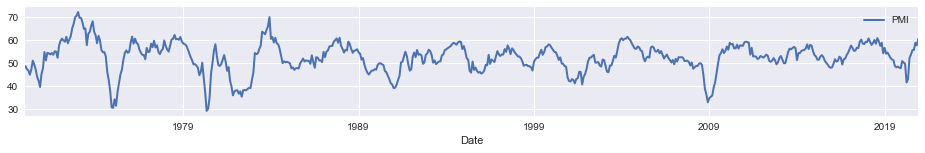

In [85]:
data.plot(lw=2.0, figsize=(16,2));

In [9]:
# Estimate OlS Regression on returns SPX and Change PMI
Overview_df = sm.add_constant(Overview)
Overview_df.head()

,const,Adjusted Close,% Change PMI
Date,,,
1970-01-30,1.0,0.000000,0.000000
1970-02-27,1.0,0.052693,-0.026694
1970-03-31,1.0,0.001453,-0.010549
1970-04-30,1.0,-0.090483,-0.040512
1970-05-29,1.0,-0.060967,0.048889


In [10]:
# Regression SPX return and PMI % change
model = sm.OLS(Overview_df['Adjusted Close'], Overview_df['% Change PMI'], missing='drop')
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Adjusted Close   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              9.309
Date:                Mon, 17 May 2021   Prob (F-statistic):                     0.00238
Time:                        08:01:38   Log-Likelihood:                          1040.7
No. Observations:                 612   AIC:                                     -2079.
Df Residuals:                     611   BIC:                                     -2075.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

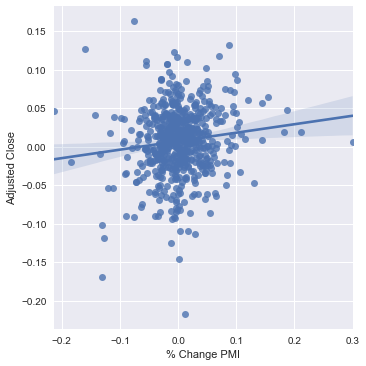

In [11]:
sns.lmplot(y="Adjusted Close", x="% Change PMI", data=Overview);

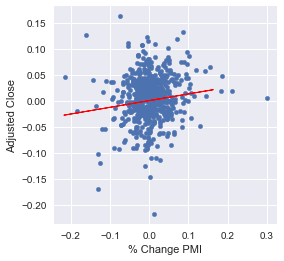

In [12]:
reg = np.polyfit(Overview['Adjusted Close'], Overview['% Change PMI'], deg=1)
ax = Overview.plot(kind='scatter', y='Adjusted Close', x='% Change PMI', figsize=(4, 4))
ax.plot(Overview['Adjusted Close'], np.polyval(reg, Overview['Adjusted Close']), 'r', lw=1
    )

Text(0, 0.5, '% Change PMI')

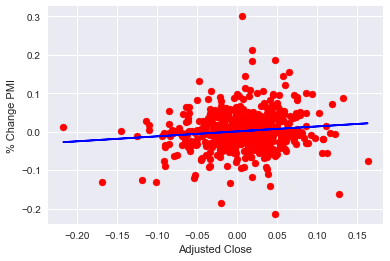

In [13]:
x = Overview[['Adjusted Close']]
y = Overview[['% Change PMI']]

regressor = LinearRegression()
regressor.fit(x, y)
y_pred = regressor.predict(x)

plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.xlabel('Adjusted Close')
plt.ylabel('% Change PMI')


In [14]:
# Compute Correlation between PMI Change and SPX monthly retunrs
Overview.corr()

,Adjusted Close,% Change PMI
Adjusted Close,1.000000,0.119116
% Change PMI,0.119116,1.000000


In [62]:
Overview2.tail()


,Adjusted Close,PMI,% Change PMI
Date,,,
2020-08-31,0.070065,55.6,0.035382
2020-09-30,-0.039228,55.7,0.001799
2020-10-30,-0.027666,58.8,0.055655
2020-11-30,0.107546,57.7,-0.018707
2020-12-31,0.037121,60.5,0.048527


In [16]:
# derive SPX returns from PMI 45-50, if PMI is increasing
OV45_50_pos = Overview2[Overview2['PMI'].between(45,50)]
OV45_50_pos = OV45_50_pos[OV45_50_pos['% Change PMI'] > 0]

OV45_50_pos.head()
return45_50_pos = OV45_50_pos.loc[:,'Adjusted Close']
return45_50_pos.mean()

return45_50_pos.mean()


-0.001904130396500347

In [17]:
# derive SPX returns from PMI 45-50, if PMI is decreasing
OV45_50_neg = Overview2[Overview2['PMI'].between(45,50)]
OV45_50_neg = OV45_50_neg[OV45_50_neg['% Change PMI'] < 0]

return45_50_neg = OV45_50_neg.loc[:,'Adjusted Close']
return45_50_neg.mean()

0.006250753752959607

In [24]:
# derive SPX returns from PMI 40-45, if PMI is increasing
OV40_45_pos = Overview2[Overview2['PMI'].between(0,45)]
OV40_45_pos = OV40_45_pos[OV40_45_pos['% Change PMI'] > 0]

return40_45_pos = OV40_45_pos.loc[:,'Adjusted Close']


return40_45_pos.mean()



0.016095318206662

In [25]:
# derive SPX returns from PMI 40-45, if PMI is decreasing
OV40_45_neg = Overview2[Overview2['PMI'].between(0,45)]
OV40_45_neg = OV40_45_neg[OV40_45_neg['% Change PMI'] < 0]

return40_45_neg = OV40_45_neg.loc[:,'Adjusted Close']
return40_45_neg.mean()

0.007348483834089888

In [24]:
# derive SPX returns from PMI 50-55, if PMI is increasing

OV50_55_pos = Overview2[Overview2['PMI'].between(50,55)]
OV50_55_pos = OV50_55_pos[OV50_55_pos['% Change PMI'] > 0]

return50_55_pos = OV50_55_pos.loc[:,'Adjusted Close']
return50_55_pos.mean()

# result of 0.77% correct, double checked with excel


0.007786766534943426

In [19]:
# derive SPX returns from PMI 50-55, if PMI is decreasing

OV50_55_neg = Overview2[Overview2['PMI'].between(50,55)]
OV50_55_neg = OV50_55_neg[OV50_55_neg['% Change PMI'] < 0]

return50_55_neg = OV50_55_neg.loc[:,'Adjusted Close']
return50_55_neg.mean()

0.005883519109019505

In [20]:
# derive SPX returns from PMI 55-60, if PMI is increasing

OV55_60_pos = Overview2[Overview2['PMI'].between(55,100)]
OV55_60_pos = OV55_60_pos[OV55_60_pos['% Change PMI'] > 0]

return55_60_pos = OV55_60_pos.loc[:,'Adjusted Close']

return55_60_pos.mean()



0.009082061050628332

In [44]:
# derive SPX returns from PMI 55-60, if PMI is decreasing

OV55_60_neg = Overview2[Overview2['PMI'].between(55,100)]
OV55_60_neg = OV55_60_neg[OV55_60_neg['% Change PMI'] < 0]

return55_60_neg = OV55_60_neg.loc[:,'Adjusted Close']

return55_60_neg.mean()

0.005883519109019505

In [18]:
# derive SPX returns from PMI below 50, if PMI is increasing
OV0_50_pos = Overview2[Overview2['PMI'].between(0,50)]
OV0_50_pos = OV0_50_pos[OV0_50_pos['% Change PMI'] > 0]

return0_50_pos = OV0_50_pos.loc[:,'Adjusted Close']

return0_50_pos.mean()



0.005295649044764593

In [70]:
# derive SPX returns from PMI below 50, if PMI is decreasing

OV0_50_neg = Overview2[Overview2['PMI'].between(0,50)]
OV0_50_neg = OV0_50_neg[OV0_50_neg['% Change PMI'] < 0]

return0_50_neg = OV0_50_neg.loc[:,'Adjusted Close']
return0_50_neg.mean()


0.007560870424603205

In [71]:
# derive SPX returns from PMI above 50, if PMI is increasing

OV50_100_pos = Overview2[Overview2['PMI'].between(50,100)]
OV50_100_pos = OV50_100_pos[OV50_100_pos['% Change PMI'] > 0]

return50_100_pos = OV50_100_pos.loc[:,'Adjusted Close']
return50_100_pos.mean()

0.008555829544864044

In [72]:
# derive SPX returns from PMI above 50, if PMI is decreasing

OV50_100_neg = Overview2[Overview2['PMI'].between(50,100)]
OV50_100_neg = OV50_100_neg[OV50_100_neg['% Change PMI'] < 0]

return50_100_neg = OV50_100_neg.loc[:,'Adjusted Close']
return50_100_neg.mean()

0.005027173754670186

In [ ]:
# Now, use IP Change as controll varible to see impact

In [27]:
IP_Change = pd.read_excel('IP Change.xlsx', index_col='Date')
IP_Change

,% Change IP
Date,
2020-12-31,0.0102
2020-11-30,0.0089
2020-10-30,0.0101
2020-09-30,-0.0008
2020-08-31,0.0096
...,...
1970-05-29,-0.0012
1970-04-30,-0.0026
1970-03-31,-0.0013


In [28]:
# Prepare PMI Change +/- for dummy
PMI_pos = Overview2[Overview2['% Change PMI'] > 0]
PMI_pos = PMI_pos.loc[:,['% Change PMI']]
PMI_pos

PMI_neg = Overview2[Overview2['% Change PMI'] < 0], rename=PMI_neg
PMI_neg = PMI_neg.loc[:,['% Change PMI']]
PMI_neg

NameError: name 'PMI_neg' is not defined

In [29]:
# Merge SPX Performance / PMI Change and IP Change
Overview3 = pd.concat([df_Performance,data1,IP_Change], axis=1)
Overview3 = Overview3.dropna()


In [30]:
print(Overview3)


            Adjusted Close  % Change PMI  % Change IP
Date                                                 
1970-02-27        0.052693     -0.026694      -0.0007
1970-03-31        0.001453     -0.010549      -0.0013
1970-04-30       -0.090483     -0.040512      -0.0026
1970-05-29       -0.060967      0.048889      -0.0012
1970-06-30       -0.050033      0.082627      -0.0032
...                    ...           ...          ...
2020-08-31        0.070065      0.035382       0.0096
2020-09-30       -0.039228      0.001799      -0.0008
2020-10-30       -0.027666      0.055655       0.0101
2020-11-30        0.107546     -0.018707       0.0089
2020-12-31        0.037121      0.048527       0.0102

[611 rows x 3 columns]


In [31]:
# Create dummy for PMI Change where 1 is rising PMI and 0 decreasing PMI
pd.get_dummies
Overview3['dummy'] = 0
for i in range(0,len(Overview3)): 
    if Overview3["% Change PMI"][i] > 0:
        Overview3['dummy'][i] = 1
        
        
        
        
print(Overview3)



            Adjusted Close  % Change PMI  % Change IP  dummy
Date                                                        
1970-02-27        0.052693     -0.026694      -0.0007      0
1970-03-31        0.001453     -0.010549      -0.0013      0
1970-04-30       -0.090483     -0.040512      -0.0026      0
1970-05-29       -0.060967      0.048889      -0.0012      1
1970-06-30       -0.050033      0.082627      -0.0032      1
...                    ...           ...          ...    ...
2020-08-31        0.070065      0.035382       0.0096      1
2020-09-30       -0.039228      0.001799      -0.0008      1
2020-10-30       -0.027666      0.055655       0.0101      1
2020-11-30        0.107546     -0.018707       0.0089      0
2020-12-31        0.037121      0.048527       0.0102      1

[611 rows x 4 columns]


<ipython-input-31-b72d5f105b3d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Overview3['dummy'][i] = 1


In [32]:
PMI_dummy = Overview3['dummy']
PMI_dummy

Date
1970-02-27    0
1970-03-31    0
1970-04-30    0
1970-05-29    1
1970-06-30    1
             ..
2020-08-31    1
2020-09-30    1
2020-10-30    1
2020-11-30    0
2020-12-31    1
Freq: BM, Name: dummy, Length: 611, dtype: int64

In [33]:
# crate table Overview4, with dummy
Overview4 = pd.concat([df_Performance,data1,IP_Change,PMI_dummy], axis=1)
Overview4 = Overview4.dropna()
print(Overview4)


            Adjusted Close  % Change PMI  % Change IP  dummy
Date                                                        
1970-02-27        0.052693     -0.026694      -0.0007    0.0
1970-03-31        0.001453     -0.010549      -0.0013    0.0
1970-04-30       -0.090483     -0.040512      -0.0026    0.0
1970-05-29       -0.060967      0.048889      -0.0012    1.0
1970-06-30       -0.050033      0.082627      -0.0032    1.0
...                    ...           ...          ...    ...
2020-08-31        0.070065      0.035382       0.0096    1.0
2020-09-30       -0.039228      0.001799      -0.0008    1.0
2020-10-30       -0.027666      0.055655       0.0101    1.0
2020-11-30        0.107546     -0.018707       0.0089    0.0
2020-12-31        0.037121      0.048527       0.0102    1.0

[611 rows x 4 columns]


In [34]:
# Regression with dummy
y = Overview4['Adjusted Close']
x1 = Overview4[['% Change IP','dummy']]
x = x = sm.add_constant(x1)
results2 = sm. OLS(y,x).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Adjusted Close   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5852
Date:                Mon, 17 May 2021   Prob (F-statistic):              0.557
Time:                        09:09:59   Log-Likelihood:                 1042.5
No. Observations:                 611   AIC:                            -2079.
Df Residuals:                     608   BIC:                            -2066.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0065      0.002      2.617      0.009       0.002       0.011
% Change IP    -0.1893      0.190     -0.997      0.319      -0.562       0.183
dummy           0.0021      0.004      0.581      0.561      -0.005       0.009
==============================================================================
Omnibus:                       48.799   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.735
Skew:                          -0.472   Prob(JB):                     4.91e-23
Kurtosis:                       4.773   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Regression SPX return and PMI Change
yx = Overview_df['Adjusted Close']
x2 = Overview_df['% Change PMI']
x = x = sm.add_constant(x)
results3 = sm. OLS(yx,x2).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Adjusted Close   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.013
Method:                 Least Squares   F-statistic:                              9.309
Date:                Mon, 17 May 2021   Prob (F-statistic):                     0.00238
Time:                        20:26:52   Log-Likelihood:                          1040.7
No. Observations:                 612   AIC:                                     -2079.
Df Residuals:                     611   BIC:                                     -2075.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
% Change PMI     0.1147      0.038      3.051      0.002       0.041       0.189
==============================================================================
Omnibus:                       43.415   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.355
Skew:                          -0.385   Prob(JB):                     9.79e-23
Kurtosis:                       4.839   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
Overview4.describe()

,Adjusted Close,% Change PMI,% Change IP,dummy
count,611.000000,611.000000,611.000000,611.000000
mean,0.007196,0.001477,0.001676,0.484452
std,0.044008,0.047599,0.009532,0.500168
min,-0.217630,-0.213904,-0.126800,0.000000
25%,-0.017779,-0.024369,-0.001850,0.000000
50%,0.009980,0.000000,0.002100,0.000000
75%,0.035754,0.024911,0.006100,1.000000
max,0.163047,0.300000,0.062400,1.000000


In [ ]:
# Starting to derive Performance next 12 Month after PMI release

In [36]:
Overview2



,Adjusted Close,PMI,% Change PMI
Date,,,
1970-01-30,0.000000,48.7,0.000000
1970-02-27,0.052693,47.4,-0.026694
1970-03-31,0.001453,46.9,-0.010549
1970-04-30,-0.090483,45.0,-0.040512
1970-05-29,-0.060967,47.2,0.048889
...,...,...,...
2020-08-31,0.070065,55.6,0.035382
2020-09-30,-0.039228,55.7,0.001799
2020-10-30,-0.027666,58.8,0.055655


In [37]:
Overview5 = Overview2.sort_index(ascending=True) 
Overview5

,Adjusted Close,PMI,% Change PMI
Date,,,
1970-01-30,0.000000,48.7,0.000000
1970-02-27,0.052693,47.4,-0.026694
1970-03-31,0.001453,46.9,-0.010549
1970-04-30,-0.090483,45.0,-0.040512
1970-05-29,-0.060967,47.2,0.048889
...,...,...,...
2020-08-31,0.070065,55.6,0.035382
2020-09-30,-0.039228,55.7,0.001799
2020-10-30,-0.027666,58.8,0.055655


In [38]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=12)
Overview5.rolling(window=indexer).mean()

,Adjusted Close,PMI,% Change PMI
Date,,,
1970-01-30,0.008019,46.225000,-0.004025
1970-02-27,0.011392,46.158333,0.000564
1970-03-31,0.007757,46.775000,0.014793
1970-04-30,0.010702,47.133333,0.010197
1970-05-29,0.021267,47.925000,0.018944
...,...,...,...
2020-08-31,NaN,NaN,NaN
2020-09-30,NaN,NaN,NaN
2020-10-30,NaN,NaN,NaN


In [39]:
df

,Adjusted Close
Date,
1970-01-30,85.02
1970-02-27,89.50
1970-03-31,89.63
1970-04-30,81.52
1970-05-29,76.55
...,...
2020-08-31,3500.31
2020-09-30,3363.00
2020-10-30,3269.96


In [40]:
# compute log returns of SPX Prices
df1 = np.log(df / df.shift(1))
df1                                     

,Adjusted Close
Date,
1970-01-30,NaN
1970-02-27,0.051352
1970-03-31,0.001451
1970-04-30,-0.094842
1970-05-29,-0.062904
...,...
2020-08-31,0.067719
2020-09-30,-0.040018
2020-10-30,-0.028056


In [41]:
# Implement Forward Indexer for 1 year and summarize returns (log returns)
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=13)                       
df2 = df1.rolling(window=indexer, min_periods=13).sum()
df2.last('20M')

,Adjusted Close
Date,
2019-05-31,0.032884
2019-06-28,0.119146
2019-07-31,0.106124
2019-08-30,0.160801
2019-09-30,0.139040
2019-10-31,0.093949
2019-11-29,0.175870
2019-12-31,0.178838
2020-01-31,NaN


In [42]:
Overview6 = pd.concat([df2,data,data1], axis=1, names=['12M Performance','PMI','Change PMI'])
Overview6 = Overview6.dropna()
Overview6


,Adjusted Close,PMI,% Change PMI
Date,,,
1970-02-27,0.129244,47.4,-0.026694
1970-03-31,0.114027,46.9,-0.010549
1970-04-30,0.148220,45.0,-0.040512
1970-05-29,0.200615,47.2,0.048889
1970-06-30,0.264222,51.1,0.082627
...,...,...,...
2019-08-30,0.160801,48.8,-0.048733
2019-09-30,0.139040,48.2,-0.012295
2019-10-31,0.093949,48.5,0.006224


In [57]:
# derive SPX returns from PMI 45-50, if PMI is increasing
OVY45_50_pos = Overview6[Overview6['PMI'].between(45,50)]
OVY45_50_pos = OVY45_50_pos[OVY45_50_pos['% Change PMI'] > 0]

OVY45_50_pos.head()

returnY45_50_pos = OVY45_50_pos.loc[:,'Adjusted Close']
returnY45_50_pos.mean()





0.04107431092500371

In [56]:
# derive SPX returns from PMI 45-50, if PMI is decreasing
OVY45_50_neg = Overview6[Overview6['PMI'].between(45,50)]
OVY45_50_neg = OVY45_50_neg[OVY45_50_neg['% Change PMI'] < 0]

returnY45_50_neg = OVY45_50_neg.loc[:,'Adjusted Close']
returnY45_50_neg.mean()


0.09815813380318042

In [50]:
# derive SPX returns from PMI 50-55, if PMI is increasing

OVY50_55_pos = Overview6[Overview6['PMI'].between(50,55)]
OVY50_55_pos = OVY50_55_pos[OVY50_55_pos['% Change PMI'] > 0]

returnY50_55_pos = OVY50_55_pos.loc[:,'Adjusted Close']
returnY50_55_pos.mean()

0.07600313301760077

In [51]:
# derive SPX returns from PMI 50-55, if PMI is decreasing

OVY50_55_neg = Overview6[Overview6['PMI'].between(50,55)]
OVY50_55_neg = OVY50_55_neg[OVY50_55_neg['% Change PMI'] < 0]

returnY50_55_neg = OVY50_55_neg.loc[:,'Adjusted Close']
returnY50_55_neg.mean()

0.09527719782652153

In [52]:
# derive SPX returns from PMI 55-60, if PMI is increasing

OVY55_60_pos = Overview6[Overview6['PMI'].between(55,100)]
OVY55_60_pos = OVY55_60_pos[OVY55_60_pos['% Change PMI'] > 0]

returnY55_60_pos = OVY55_60_pos.loc[:,'Adjusted Close']

returnY55_60_pos.mean()


0.04585790231960244

In [53]:
# derive SPX returns from PMI 55-60, if PMI is decreasing

OVY55_60_neg = Overview6[Overview6['PMI'].between(55,100)]
OVY55_60_neg = OVY55_60_neg[OVY55_60_neg['% Change PMI'] < 0]

returnY55_60_neg = OVY55_60_neg.loc[:,'Adjusted Close']

returnY55_60_neg.mean()

0.06382865440887144

In [54]:
# derive SPX returns from PMI 40-45, if PMI is increasing
OVY00_45_pos = Overview6[Overview6['PMI'].between(0,45)]
OVY00_45_pos = OVY00_45_pos[OVY00_45_pos['% Change PMI'] > 0]

returnY00_45_pos = OVY00_45_pos.loc[:,'Adjusted Close']

returnY00_45_pos.mean()

0.1728437674974272

In [55]:
# derive SPX returns from PMI 40-45, if PMI is decreasing
OVY00_45_neg = Overview6[Overview6['PMI'].between(0,45)]
OVY00_45_neg = OVY00_45_neg[OVY00_45_neg['% Change PMI'] < 0]

returnY00_45_neg = OVY00_45_neg.loc[:,'Adjusted Close']
returnY00_45_neg.mean()

0.13366198597366982

In [58]:
# derive SPX returns from PMI below 50, if PMI is increasing
OVY0_50_pos = Overview6[Overview6['PMI'].between(0,50)]
OVY0_50_pos = OVY0_50_pos[OVY0_50_pos['% Change PMI'] > 0]

returnY0_50_pos = OVY0_50_pos.loc[:,'Adjusted Close']

returnY0_50_pos.mean()



0.09263627219247378

In [59]:
# derive SPX returns from PMI below 50, if PMI is decreasing

OVY0_50_neg = Overview6[Overview6['PMI'].between(0,50)]
OVY0_50_neg = OVY0_50_neg[OVY0_50_neg['% Change PMI'] < 0]

returnY0_50_neg = OVY0_50_neg.loc[:,'Adjusted Close']
returnY0_50_neg.mean()


0.10985002626235256

In [60]:
# derive SPX returns from PMI above 50, if PMI is increasing

OVY50_100_pos = Overview6[Overview6['PMI'].between(50,100)]
OVY50_100_pos = OVY50_100_pos[OVY50_100_pos['% Change PMI'] > 0]

returnY50_100_pos = OVY50_100_pos.loc[:,'Adjusted Close']
returnY50_100_pos.mean()

0.06105434093327579

In [61]:
# derive SPX returns from PMI above 50, if PMI is decreasing

OVY50_100_neg = Overview6[Overview6['PMI'].between(50,100)]
OVY50_100_neg = OVY50_100_neg[OVY50_100_neg['% Change PMI'] < 0]

returnY50_100_neg = OVY50_100_neg.loc[:,'Adjusted Close']
returnY50_100_neg.mean()

0.08029199012130259

In [68]:
Overview7 = pd.concat([df2,data1], axis=1, names=['12M Performance','Change PMI'])
Overview7 = Overview7.dropna(0)
Overview7

,Adjusted Close,% Change PMI
Date,,
1970-02-27,0.129244,-0.026694
1970-03-31,0.114027,-0.010549
1970-04-30,0.148220,-0.040512
1970-05-29,0.200615,0.048889
1970-06-30,0.264222,0.082627
...,...,...
2019-08-30,0.160801,-0.048733
2019-09-30,0.139040,-0.012295
2019-10-31,0.093949,0.006224


In [69]:
Overview7.corr()

,Adjusted Close,% Change PMI
Adjusted Close,1.000000,-0.009117
% Change PMI,-0.009117,1.000000
